In [ ]:


import numpy as np
import pandas as pd
from keras.engine.training import Model
from keras.layers.serialization import activation
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras import layers
from keras import models
from tensorflow.keras.layers import Input
import tensorflow_datasets as tfds
from keras.utils.vis_utils import plot_model
import os
import cv2
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.data.experimental import AUTOTUNE
from keras.layers.merging.concatenate import Concatenate
from tensorflow.python.ops.gen_control_flow_ops import merge
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Conv2D, Reshape
from tensorflow.keras.utils import Sequence
from keras.backend import epsilon
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import string
import cv2

from tqdm.notebook import tqdm_notebook as tqdm

import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import numpy as np
from sklearn.feature_extraction. text import TfidfVectorizer
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re


from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")


In [ ]:


train=pd.read_csv("/content/gdrive/MyDrive/Diploma/train.txt", names=['content', 'sentiment'], sep=';')
test=pd.read_csv("/content/gdrive/MyDrive/Diploma/test.txt", names=['content', 'sentiment'], sep=';')
val=pd.read_csv("/content/gdrive/MyDrive/Diploma/val.txt", names=['content', 'sentiment'], sep=';')
datat = pd.concat([train,test,val])


In [ ]:
train.head()

,content,sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
print(datat.shape)

(20000, 2)


In [ ]:
datat['content']


0                                 i didnt feel humiliated
1       i can go from feeling so hopeless to so damned...
2        im grabbing a minute to post i feel greedy wrong
3       i am ever feeling nostalgic about the fireplac...
4                                    i am feeling grouchy
                              ...                        
1995    im having ssa examination tomorrow in the morn...
1996    i constantly worry about their fight against n...
1997    i feel its important to share this info for th...
1998    i truly feel that if you are passionate enough...
1999    i feel like i just wanna buy any cute make up ...
Name: content, Length: 20000, dtype: object

In [ ]:

def duplicated_all(data):
  index = data[data.duplicated() == True].index
  data.drop(index, axis = 0, inplace = True)
  data.reset_index(inplace=True, drop = True)
  return data

In [ ]:
def duplicated_content(data):
  index = data[data['content'].duplicated() == True].index
  data.drop(index, axis = 0, inplace = True)
  data.reset_index(inplace=True, drop = True)
  return data

In [ ]:
duplicated_all(datat)
duplicated_content(datat)

,content,sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
19943,im having ssa examination tomorrow in the morn...,sadness
19944,i constantly worry about their fight against n...,joy
19945,i feel its important to share this info for th...,joy
19946,i truly feel that if you are passionate enough...,joy


In [ ]:
datat[datat['content'].duplicated() == True]

,content,sentiment


In [ ]:
print(datat.shape)

(19948, 2)


In [ ]:
datat.isnull().sum()

content      0
sentiment    0
dtype: int64

In [ ]:

nltk.download('all')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
import nltk
#nltk.download()
#nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer, WordNetLemmatizer


In [ ]:

stopwords_english = set(stopwords.words("english"))
stemmer = PorterStemmer()
lemmatizer= WordNetLemmatizer()

import re
def cleanTxt(text):
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub('#', '', text)
    text = re.sub('RT[\s]+', '', text)
    text = re.sub('\w+:\/\/\S+', '', text)
    text = re.sub(r'http\S+', ' ', text)
    text =text.translate(str.maketrans('', '', string.punctuation))
    #text.lower()
    return text

def lemmatization(text):
    text = text.split()
    text=[lemmatizer.lemmatize(y) for y in text]
    #text=[stemmer.stem(y) for y in text]
    return " " .join(text)

def remove_stop_words(text):
    Text=[i for i in str(text).split() if i not in stopwords_english]
    return " ".join(Text)

def removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):
    text = text.split()
    text=[y.lower() for y in text]
    return " " .join(text)

def removing_punctuations(text):

    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan

def normalize_text(df):
    df.content=df.content.apply(cleanTxt)
    df.content=df.content.apply(lambda text : remove_stop_words(text))
    df.content=df.content.apply(lambda text : lemmatization(text))
    df.content=df.content.apply(lambda text : lower_case(text))
    df.content=df.content.apply(lambda text : removing_numbers(text))
    df.content=df.content.apply(lambda text : removing_punctuations(text))
    df.content=df.content.apply(lambda text : removing_urls(text))
    return df

def normalize_sentence(s):
    s=cleanTxt(s)
    s=remove_stop_words(s)
    s=lemmatization(s)
    s= lower_case(s)
    s= removing_numbers(s)
    s= removing_punctuations(s)
    s= removing_urls(s)
    return s


In [ ]:


normalize_sentence("He walked through 3949242 https://kxksnx.com  the gloomy and dark forest on a barely visible path ")


'he walked gloomy dark forest barely visible path'

In [ ]:


datat=normalize_text(datat)


In [ ]:
datat.tail(2)

,content,sentiment
19946,truly feel passionate enough something stay tr...,joy
19947,feel like wanna buy cute make see online even one,joy


In [ ]:
datat['sentiment'].value_counts()

joy         6740
sadness     5793
anger       2703
fear        2369
love        1630
surprise     713
Name: sentiment, dtype: int64

joy         6740
sadness     5793
anger       2703
fear        2369
love        1630
surprise     713
Name: sentiment, dtype: int64

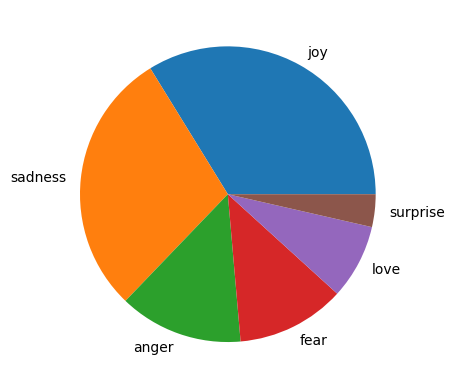

In [ ]:
piechart=datat['sentiment'].value_counts()
label=('joy','sadness','anger','fear','love','surprise')
plt.pie(piechart,labels=label)
piechart


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(datat["content"],datat['sentiment'],test_size=0.3)

In [ ]:
X_test.shape

(5985, 229)

In [ ]:
y_train.shape


(13963,)

In [ ]:
x_train.shape

(13963,)

In [ ]:
from tensorflow.keras.utils import to_categorical
le = LabelEncoder()
def encoder(y_train,y_test):
  y_train = le.fit_transform(y_train)
  y_test = le.transform(y_test)
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  return y_train,y_test

y_train,y_test=encoder(y_train,y_test)

In [ ]:

y_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

In [ ]:
tokenizer.document_count

19948

In [ ]:
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)


In [ ]:
maxlen = max([len(t) for t in datat['content']])
maxlen

229

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(sequences_train, maxlen=maxlen, truncating='pre')
X_test = pad_sequences(sequences_test, maxlen=maxlen, truncating='pre')

vocabSize = len(tokenizer.index_word) + 1
print(f"Vocabulary size = {vocabSize}")

Vocabulary size = 15106


In [ ]:
 tokenizer.word_index.items()

dict_items([('UNK', 1), ('feel', 2), ('feeling', 3), ('like', 4), ('im', 5), ('time', 6), ('really', 7), ('know', 8), ('get', 9), ('make', 10), ('little', 11), ('people', 12), ('day', 13), ('want', 14), ('thing', 15), ('one', 16), ('would', 17), ('life', 18), ('think', 19), ('still', 20), ('ive', 21), ('even', 22), ('way', 23), ('bit', 24), ('something', 25), ('love', 26), ('going', 27), ('much', 28), ('dont', 29), ('could', 30), ('go', 31), ('need', 32), ('back', 33), ('good', 34), ('pretty', 35), ('always', 36), ('say', 37), ('see', 38), ('right', 39), ('work', 40), ('also', 41), ('today', 42), ('friend', 43), ('year', 44), ('around', 45), ('made', 46), ('cant', 47), ('though', 48), ('help', 49), ('got', 50), ('well', 51), ('come', 52), ('didnt', 53), ('lot', 54), ('felt', 55), ('someone', 56), ('never', 57), ('thought', 58), ('look', 59), ('every', 60), ('week', 61), ('happy', 62), ('le', 63), ('many', 64), ('sure', 65), ('enough', 66), ('quite', 67), ('find', 68), ('away', 69), ('t

In [ ]:
!unzip gdrive/My\Drive/Diploma/ezyzip.zip

Archive:  gdrive/MyDrive/Diploma/ezyzip.zip
  inflating: glove.6B.200d.txt       


In [ ]:

path_to_glove_file = 'glove.6B.200d.txt'
num_tokens = vocabSize
embedding_dim = 200
hits = 0
misses = 0
embeddings_index = {}

In [ ]:

with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs
print("Found %s word vectors." % len(embeddings_index))


embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Found 400000 word vectors.
Converted 27844 words (2366 misses)


In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

In [ ]:
vocabSize = len(tokenizer.index_word) + 1
vocabSize

15106

In [ ]:
embedding_matrix.shape

(15106, 200)

In [ ]:
adam = Adam(learning_rate=0.005)

model = Sequential()
model.add(Embedding(vocabSize, 200, input_length=X_train.shape[1], weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(256, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 229, 200)          3021200   
                                                                 
 bidirectional (Bidirectiona  (None, 229, 512)         935936    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 229, 256)         656384    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 1542      
                                                        

In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [ ]:

callback = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True
)

In [ ]:

history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    batch_size=256,
                    epochs=9,
                    callbacks=[callback]
                   )

Epoch 1/9
55/55 [==============================] - 1947s 35s/step - loss: 1.3132 - accuracy: 0.4958 - val_loss: 0.8952 - val_accuracy: 0.6876
Epoch 2/9
55/55 [==============================] - 1877s 34s/step - loss: 0.7802 - accuracy: 0.7343 - val_loss: 0.4361 - val_accuracy: 0.8485
Epoch 3/9
55/55 [==============================] - 1877s 34s/step - loss: 0.3368 - accuracy: 0.8776 - val_loss: 0.3154 - val_accuracy: 0.8830
Epoch 4/9
55/55 [==============================] - 1872s 34s/step - loss: 0.2145 - accuracy: 0.9150 - val_loss: 0.2148 - val_accuracy: 0.9128
Epoch 5/9
55/55 [==============================] - 1869s 34s/step - loss: 0.1505 - accuracy: 0.9338 - val_loss: 0.1806 - val_accuracy: 0.9210
Epoch 6/9
55/55 [==============================] - 1850s 34s/step - loss: 0.1220 - accuracy: 0.9446 - val_loss: 0.1818 - val_accuracy: 0.9268
Epoch 7/9
55/55 [==============================] - 1873s 34s/step - loss: 0.1066 - accuracy: 0.9496 - val_loss: 0.1699 - val_accuracy: 0.9278
Epoch 

In [ ]:
filename = 'classification.h5'
model.save(filename)

In [ ]:
def prediction(sentences):
  for sentence in sentences:
    print(sentence)
    sentence = normalize_sentence(sentence)
    sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
    result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(model.predict(sentence))
    print(f"{result} : {proba}\n\n")

In [ ]:
sentence= 'my old brother is dead'
print(sentence)
sentence = normalize_sentence(sentence)
sentence = tokenizer.texts_to_sequences([sentence])
sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
proba =  np.max(model.predict(sentence))
print(f"{result} : {proba}\n\n")

my old brother is dead
1/1 [==============================] - 1s 515ms/step
sadness : 0.9176148176193237




In [ ]:
m=["i'm very glad to see you",
   "Not a nasty, dirty, wet hole, filled with the ends of worms and an oozy smell, nor yet a dry, bare, sandy hole with nothing in it to sit down on or to eat: it was a hobbit-hole, and that means comfort.",
   "there stood Balin and Dwalin at the door of the kitchen, and Fili and Kili behind them, and before he could say knife they had whisked the trays and a couple of small tables into the parlour and set out everything afresh.",
   "Gannibal is best doctor"]

prediction(m)

i'm very glad to see you
1/1 [==============================] - 1s 601ms/step
joy : 0.9463940858840942


Not a nasty, dirty, wet hole, filled with the ends of worms and an oozy smell, nor yet a dry, bare, sandy hole with nothing in it to sit down on or to eat: it was a hobbit-hole, and that means comfort.
1/1 [==============================] - 1s 844ms/step
joy : 0.9873606562614441


there stood Balin and Dwalin at the door of the kitchen, and Fili and Kili behind them, and before he could say knife they had whisked the trays and a couple of small tables into the parlour and set out everything afresh.
1/1 [==============================] - 1s 1s/step
love : 0.5954964756965637


Gannibal is best doctor
1/1 [==============================] - 1s 597ms/step
joy : 0.48795613646507263




(<Figure size 504x360 with 1 Axes>, <Figure size 560x400 with 1 Axes>)


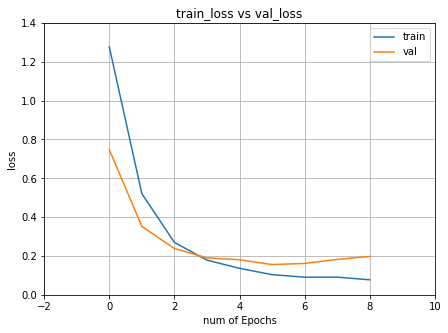

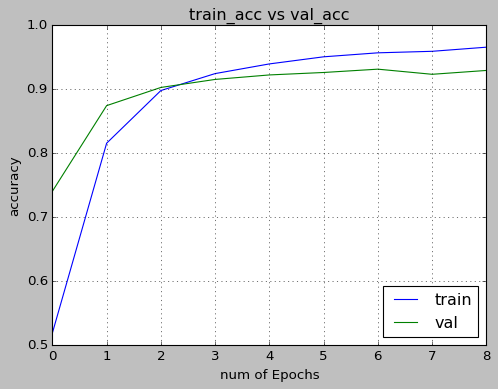

In [ ]:
print(histogram(history))



>RandomForestClassifier


In [ ]:
X = test["content"].values
Y = test["sentiment"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)



In [ ]:
X_train

array(['so much skype blackberri may', 'stressfre way', 'write report',
       ..., 'the muse grip firmli throat realli enjoy write',
       'peopl alway onlin loneliest agre', 'road bet would right'],
      dtype=object)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

sgd = Pipeline([('vect', TfidfVectorizer()),
                ('clf', RandomForestClassifier(random_state = 0))])

sgd.fit(X_train, Y_train)
y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, Y_test))
print(classification_report(Y_test, y_pred))

accuracy 0.5133333333333333
              precision    recall  f1-score   support

       anger       0.67      0.11      0.20        70
        fear       0.74      0.39      0.51        64
         joy       0.46      0.84      0.60       211
        love       1.00      0.16      0.28        50
     sadness       0.54      0.48      0.51       184
    surprise       1.00      0.05      0.09        21

    accuracy                           0.51       600
   macro avg       0.73      0.34      0.36       600
weighted avg       0.60      0.51      0.47       600



In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

sgd = Pipeline([('vect', TfidfVectorizer()),
                ('clf', RandomForestClassifier(random_state = 0))])

sgd.fit(X_train, Y_train)
y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, Y_test))
print(classification_report(Y_test, y_pred))

accuracy 0.8477083333333333
              precision    recall  f1-score   support

       anger       0.87      0.78      0.82       607
        fear       0.86      0.76      0.80       566
         joy       0.78      0.95      0.86      1581
        love       0.89      0.64      0.75       434
     sadness       0.92      0.88      0.90      1434
    surprise       0.84      0.70      0.76       178

    accuracy                           0.85      4800
   macro avg       0.86      0.78      0.82      4800
weighted avg       0.85      0.85      0.85      4800



In [ ]:
#enc=LabelEncoder()
def predict(model,text):
    text=pd.Series(text)
    #text=normalize_sntence(text)
    #text=enc.fit_transform(text)
    pred=model.predict(text)
    print(pred)

predict(sgd,"Sunny day in beatiful forest")
predict(sgd,"i'm very surprise to see you")
predict(sgd,"He is going throw the dark forest, he is so sad sad sad and afraid")

['joy']
['joy']
['fear']


In [ ]:

def histogram(history):
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  xc = range(len(train_acc))

  a=plt.figure(1,figsize=(7,5))

  plt.plot(xc,train_loss)
  plt.plot(xc,val_loss)
  plt.xlabel('num of Epochs')
  plt.ylabel('loss')
  plt.title('train_loss vs val_loss')
  plt.grid(True)
  plt.legend(['train','val'])

  plt.style.use(['classic'])

  b=plt.figure(2,figsize=(7,5))
  plt.plot(xc,train_acc)
  plt.plot(xc,val_acc)
  plt.xlabel('num of Epochs')
  plt.ylabel('accuracy')
  plt.title('train_acc vs val_acc')
  plt.grid(True)
  plt.legend(['train','val'],loc=4)
  plt.style.use(['classic'])
  return a,b